In [12]:
import sys #터미널에서 사용자로부터 인자를 받기 위해
from bs4 import BeautifulSoup # 받은 HTML코드를 파싱하기 위해
from urllib.request import urlopen
from urllib.parse import quote # URL주소에 한글이 포함되었을때, 아스키형식으로 바꿔주기
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
from tqdm import tqdm as tqdm

사람인 첫 화면 : https://www.saramin.co.kr/zf_user/<br><br>
1) '데이터 분석' 키워드 검색 : http://www.saramin.co.kr/zf_user/search?search_area=main&search_done=y&search_optional_item=n&searchType=search&searchword=%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D<br>%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D : 데이터분석 ASCII -> quote(데이터분석)으로 변환

In [22]:
GET_TARGET_FRONT = " http://www.saramin.co.kr/zf_user/search?search_area=main&search_done=y&search_optional_item=n&searchType=search&searchword="
GET_TARGET_BACK = "데이터분석"
GET_TARGET_URL_1 = GET_TARGET_FRONT + quote(GET_TARGET_BACK)
print(GET_TARGET_URL_1)
#키워드 목록을 얻었다!

 http://www.saramin.co.kr/zf_user/search?search_area=main&search_done=y&search_optional_item=n&searchType=search&searchword=%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D


In [23]:
S_url_list=[]

In [24]:
S_job_list=[]

In [25]:
src_list=[]

In [29]:
print(len(S_url_list))

243


In [27]:
driver = webdriver.Chrome(r'C:\Users\유정수\Downloads\chromedriver_win32/chromedriver')
driver.get(GET_TARGET_URL_1)
for i in range(9):
    driver.find_element_by_xpath('//*[@id="recruit_info_list"]/div/a[{}]'.format(str(1+i))).click()
    html=driver.page_source
    soup=BeautifulSoup(html,"html.parser")
    S_job_list.extend(soup.select('div.riin > p.txt > span > a'))
driver.close()
print(S_job_list)

[<a class="" href="/zf_user/jobs/relay/view?view_type=search&amp;rec_idx=35712685&amp;location=ts&amp;searchword=%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D&amp;searchType=search&amp;paid_fl=n" onclick="try{s_trackApply(this, 'search', 'generic')}catch(e){};" rel="nofollow" target="_blank" title="데이터분석, 판매전략, 영업기획, 경영정보 / 해외법인 관리 및 운영 정.."><span><strong>데이터분석</strong>, 판매전략, 영업기획, 경영정보 / 해외법인 관리 및 운영 정..</span></a>, <a class="" href="/zf_user/jobs/relay/view?view_type=search&amp;rec_idx=35702454&amp;location=ts&amp;searchword=%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D&amp;searchType=search&amp;paid_fl=n" onclick="try{s_trackApply(this, 'search', 'generic')}catch(e){};" rel="nofollow" target="_blank" title="(주)한화이글스 데이터분석 경력사원 채용"><span>(주)한화이글스 <strong>데이터분석</strong> 경력사원 채용</span></a>, <a class="" href="/zf_user/jobs/relay/view?view_type=search&amp;rec_idx=35663809&amp;location=ts&amp;searchword=%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D&amp;searchType=search&amp;paid_fl=n" on

In [28]:
for job in S_job_list:
    S_url_list.append(job['href'])

print(S_url_list)

['/zf_user/jobs/relay/view?view_type=search&rec_idx=35712685&location=ts&searchword=%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D&searchType=search&paid_fl=n', '/zf_user/jobs/relay/view?view_type=search&rec_idx=35702454&location=ts&searchword=%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D&searchType=search&paid_fl=n', '/zf_user/jobs/relay/view?view_type=search&rec_idx=35663809&location=ts&searchword=%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D&searchType=search&paid_fl=n', '/zf_user/jobs/relay/view?view_type=search&rec_idx=35605211&location=ts&searchword=%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D&searchType=search&paid_fl=n', '/zf_user/jobs/relay/view?view_type=search&rec_idx=35655783&location=ts&searchword=%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D&searchType=search&paid_fl=n', '/zf_user/jobs/relay/view?view_type=search&rec_idx=35574534&location=ts&searchword=%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D&searchType=search&paid_fl=n', '/zf_user/jobs/relay/view?view_type=search&re

In [30]:
for i in range(3):
    print('http://www.saramin.co.kr'+S_url_list[i])

http://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=search&rec_idx=35712685&location=ts&searchword=%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D&searchType=search&paid_fl=n
http://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=search&rec_idx=35702454&location=ts&searchword=%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D&searchType=search&paid_fl=n
http://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=search&rec_idx=35663809&location=ts&searchword=%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D&searchType=search&paid_fl=n


In [32]:
a='http://www.saramin.co.kr'

In [ ]:
dataframe=pd.DataFrame(S_url_list)
dataframe.to_csv("S_url_list.csv",header=False, index=False)

In [ ]:
#iframe 접근 시도2!!!!!!!성공
driver = webdriver.Chrome(r'C:\Users\유정수\Downloads\chromedriver_win32/chromedriver')
url=a+S_url_list[0]
driver.get(url)
src=driver.find_element_by_name('iframe_content_0').get_attribute("src")
driver.close()
print(src)

In [33]:
for i in tqdm(range(100)):
    driver = webdriver.Chrome(r'C:\Users\유정수\Downloads\chromedriver_win32/chromedriver')
    url=a+S_url_list[i]
    driver.get(url)
    src=driver.find_element_by_name('iframe_content_0').get_attribute("src")
    driver.close()
    src_list.append(src)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [20:22<00:00, 11.89s/it]


In [34]:
print(src_list)

['http://www.saramin.co.kr/zf_user/jobs/relay/view-detail?rec_idx=35712685&rec_seq=0', 'http://www.saramin.co.kr/zf_user/jobs/relay/view-detail?rec_idx=35702454&rec_seq=0', 'http://www.saramin.co.kr/zf_user/jobs/relay/view-detail?rec_idx=35663809&rec_seq=0', 'http://www.saramin.co.kr/zf_user/jobs/relay/view-detail?rec_idx=35605211&rec_seq=0', 'http://www.saramin.co.kr/zf_user/jobs/relay/view-detail?rec_idx=35655783&rec_seq=0', 'http://www.saramin.co.kr/zf_user/jobs/relay/view-detail?rec_idx=35574534&rec_seq=0', 'http://www.saramin.co.kr/zf_user/jobs/relay/view-detail?rec_idx=35620397&rec_seq=0', 'http://www.saramin.co.kr/zf_user/jobs/relay/view-detail?rec_idx=35695547&rec_seq=0', 'http://www.saramin.co.kr/zf_user/jobs/relay/view-detail?rec_idx=35570872&rec_seq=0', 'http://www.saramin.co.kr/zf_user/jobs/relay/view-detail?rec_idx=35616379&rec_seq=0', 'http://www.saramin.co.kr/zf_user/jobs/relay/view-detail?rec_idx=35294178&rec_seq=0', 'http://www.saramin.co.kr/zf_user/jobs/relay/view-det

In [36]:
print(src_list[0])

http://www.saramin.co.kr/zf_user/jobs/relay/view-detail?rec_idx=35712685&rec_seq=0


In [ ]:
#가져온 src를 파일로 저장
dataframe=pd.DataFrame(src_list)
dataframe.to_csv("src_list.csv",header=False, index=False)

In [62]:
text=''

In [54]:
for i in range(1):
    webpage=urlopen(src_list[i+1])
    soup=BeautifulSoup(webpage,'lxml',from_encoding='utf-8')
    texts=soup.findAll(['b','br','p','td'])
    
    for i in range(len(texts)):
        text.append(texts[i].text.strip().replace('\n','').replace('\t','').replace('\r','').replace('/','').replace('\xa0',''))

In [55]:
text

['',
 '',
 '',
 '',
 '채용부문자격요건 및 우대사항인원   데이터분석- 통계 프로그램을 활용한 데이터분석 프로젝트 수행 가능한 자      ※ R, SAS, SPSS 등 상용 분석툴 활용- 야구에 대한 깊은 관심과 이해도 높은 자- MS Office 제품군 사용 능숙자※  포트폴리오 필수 제출(개인 분석 역량을 활용한 야구 관련 자유 주제)[우대사항]- 데이터분석 관련 업무 경력자- 관련 전공(통계학 및 IT관련 학과 등)자- 데이터 시각화 업무 경험 및 유사 프로젝트 경험자- 커뮤니케이션(발표, 코칭, 소통) 역량 우수자- 어학(영어, 일어) 역량 우수자0명',
 '채용부문',
 '채용부문',
 '자격요건 및 우대사항',
 '자격요건 및 우대사항',
 '인원',
 '인원',
 '데이터분석',
 '데이터분석',
 '- 통계 프로그램을 활용한 데이터분석 프로젝트 수행 가능한 자      ※ R, SAS, SPSS 등 상용 분석툴 활용- 야구에 대한 깊은 관심과 이해도 높은 자- MS Office 제품군 사용 능숙자※  포트폴리오 필수 제출(개인 분석 역량을 활용한 야구 관련 자유 주제)[우대사항]- 데이터분석 관련 업무 경력자- 관련 전공(통계학 및 IT관련 학과 등)자- 데이터 시각화 업무 경험 및 유사 프로젝트 경험자- 커뮤니케이션(발표, 코칭, 소통) 역량 우수자- 어학(영어, 일어) 역량 우수자',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '[우대사항]',
 '',
 '',
 '',
 '',
 '',
 '0명',
 '',
 '',
 '',
 '- 근무형태 : 정규직          - 근무요일시간: 주 5일(월~금) 오전 8시 30분~오후 5시 30분           - 근무지역 :           대전-중구          - 급여: 회사내규에 따름           - 회사주소: (35021) 대전 중구 대종로 373 한밭종합운동장 한화이글스(부사동)',
 '',
 '- 근무형태 : 정규직          -

In [63]:
for i in tqdm(range(100)):
    webpage=urlopen(src_list[i])
    soup=BeautifulSoup(webpage,'lxml',from_encoding='utf-8')
    texts=soup.findAll(['b','br','p','td'])
    
    for word in texts:
        text=text+" "+word.get_text().strip().replace('\n','').replace('\t','').replace('\r','').replace('/','').replace('\xa0','')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:26<00:00,  4.73it/s]


In [64]:
text

'     모집부문주요업무필수요건우대사항 적합성향 전략기획      (0명) - 판매예측, 분석, 전략       - 제품발주, 유통       - 재고조사 및 관리       - 리서치&리포트       - 데이터 시스템 구축       - 글로벌 스토어 관리       - 스토어 손익분석\u200b <필수요건>       - 외국어 능통자(영어중국어일본어       프랑스어독일어스페인어베트남어       러시아어아랍어 등)       - 엑셀 고급(인덱스, 피벗, VLOOK UP 등)       - 해외 출국에 결격 사유가 없는 분 <우대사항>       - 시각디자인, 파워포인트       - 마케팅, 통계학, ERP, CRM       - 계리사 관련직 준비자 - 정리하는 것을 좋아하고 꼼꼼하신 분       - 어떤 문제의 해결에 책임감을 가지고        끝까지 임하는 분       - 경청하기를 즐겨하고   상대의 감정에        대한    공감력과 이해도가 높은 분       - 다양한 이슈 속에서도 객관적 사고를        유지할 수 있는 분       - 데이터 수집을 즐기고 예측과 결과가        일치하였을 때    희열을 느끼는 분       - 시간관념이 철저하신 분       - 전산처리 및 OA 활용 능력 우수자  해외      Distributor      관리      (1명)-      전세계에 위치한        거래처와의 원활한            Communication       -      효율적인 출고 및 판매를       통한 매출 극대화       -      이슈 처리방안 논의 및       해결       -      매출 데이터 수집 및 분석       -      Invoice 및 수출 관련            서류 작업 <필수요건>       -      영어 능통자(영어면접 有)       -      수준급 영문 이메일 작성 가능자       -      해외 출장에 결격 사유가 없는 분 <

In [61]:
text=[]
for i in range(1):
    webpage=urlopen(src_list[i+3])
    soup=BeautifulSoup(webpage,'lxml',from_encoding='utf-8')
    texts=soup.findAll(['b','br','p','td'])
    
    for i in range(len(texts)):
        text.append(texts[i].text.strip().replace('\n','').replace('\t','').replace('\r','').replace('/','').replace('\xa0',''))
text

['',
 '모집부문 및 자격요건담당업무자격요건 및 우대사항 데이터분석 -통계 프로그램을 활용한 데이터분석 프로젝트 수행 가능한 자 ※R, SAS, SPSS 등 상용분석툴 활용- 야구에 대한 깊은 관심과 이해도 높은 자- MS Office 제품군 사용 능숙자※ 포트폴리오 필수 제출 (개인 분석 역량을 활용한 야구 관련 자유 주제)[우대사항]- 데이터분석 관련 업무 경력자- 관련 전공(통계학 및 IT관련 학과 등)자-데이터 시각화 업무 경험 및 유사 프로젝트 경험자- 커뮤니케이션(발표, 코칭, 소통) 역량 우수자- 어학(영어, 일어) 역량 우수자',
 '데이터분석',
 '데이터분석',
 '-통계 프로그램을 활용한 데이터분석 프로젝트 수행 가능한 자 ※R, SAS, SPSS 등 상용분석툴 활용- 야구에 대한 깊은 관심과 이해도 높은 자- MS Office 제품군 사용 능숙자※ 포트폴리오 필수 제출 (개인 분석 역량을 활용한 야구 관련 자유 주제)[우대사항]- 데이터분석 관련 업무 경력자- 관련 전공(통계학 및 IT관련 학과 등)자-데이터 시각화 업무 경험 및 유사 프로젝트 경험자- 커뮤니케이션(발표, 코칭, 소통) 역량 우수자- 어학(영어, 일어) 역량 우수자',
 '-통계 프로그램을 활용한 데이터분석 프로젝트 수행 가능한 자',
 '※R, SAS, SPSS 등 상용분석툴 활용',
 '- 야구에 대한 깊은 관심과 이해도 높은 자',
 '- MS Office 제품군 사용 능숙자',
 '',
 '※ 포트폴리오 필수 제출',
 '(개인 분석 역량을 활용한 야구 관련 자유 주제)',
 '',
 '[우대사항]',
 '[우대사항]',
 '- 데이터분석 관련 업무 경력자',
 '- 관련 전공(통계학 및 IT관련 학과 등)자',
 '-데이터 시각화 업무 경험 및 유사 프로젝트 경험자',
 '- 커뮤니케이션(발표, 코칭, 소통) 역량 우수자',
 '- 어학(영어, 일어) 역량 우수자',
 '근무조건 및 환경근무형태정규직근무요일시간주 5일(월~금) 오전 8시 30분~오후 5시 30

In [65]:
import nltk
import re
import platform
import numpy as np
from PIL import Image
from konlpy.tag import Twitter; t=Twitter()
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

#-----------------------------

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [67]:
with open('row_text_1.txt','a',encoding='utf-8') as file:
    file.write(text)

In [68]:
with open('row_text_1.txt','r',encoding='utf-8') as file:
    lines=file.readlines()

In [72]:
ko_text = re.sub('[-=,#/■□●_○◆☎▶▷\?ㅇ→:①⇒^$②③•④◦.@*\"※~%ㆍ!』\\‘|\>\<\(\)\[\]]',' ',lines[0])

In [73]:
ko_text

"     모집부문주요업무필수요건우대사항 적합성향 전략기획       0명    판매예측  분석  전략         제품발주  유통         재고조사 및 관리         리서치&리포트         데이터 시스템 구축         글로벌 스토어 관리         스토어 손익분석\u200b  필수요건          외국어 능통자 영어중국어일본어       프랑스어독일어스페인어베트남어       러시아어아랍어 등          엑셀 고급 인덱스  피벗  VLOOK UP 등          해외 출국에 결격 사유가 없는 분  우대사항          시각디자인  파워포인트         마케팅  통계학  ERP  CRM         계리사 관련직 준비자   정리하는 것을 좋아하고 꼼꼼하신 분         어떤 문제의 해결에 책임감을 가지고        끝까지 임하는 분         경청하기를 즐겨하고   상대의 감정에        대한    공감력과 이해도가 높은 분         다양한 이슈 속에서도 객관적 사고를        유지할 수 있는 분         데이터 수집을 즐기고 예측과 결과가        일치하였을 때    희열을 느끼는 분         시간관념이 철저하신 분         전산처리 및 OA 활용 능력 우수자  해외      Distributor      관리       1명        전세계에 위치한        거래처와의 원활한            Communication              효율적인 출고 및 판매를       통한 매출 극대화              이슈 처리방안 논의 및       해결              매출 데이터 수집 및 분석              Invoice 및 수출 관련            서류 작업  필수요건               영어 능통자 영어면접 有               수준급 영문 이메일 작성 가능자              해외 출장에 결격 사유가 없는 분  

In [74]:
tokens_ko = t.nouns(ko_text)
print(tokens_ko)

['모집', '부문', '업무', '필수', '건우', '사항', '적합', '성향', '전략기획', '명', '판매', '예측', '분석', '전략', '제품', '발주', '유통', '재고', '조사', '및', '관리', '리서치', '리포트', '데이터', '시스템', '구축', '글로벌', '스토어', '관리', '스토어', '손익', '분석', '필수', '요건', '외국어', '능통', '영어', '중국어', '일본어', '프랑스어', '독일어', '스페인어', '베트남어', '러시아어', '아랍어', '등', '엑셀', '고급', '인덱스', '피벗', '등', '해외', '출국', '결격', '사유', '분', '우대', '사항', '시각디자인', '파워포인트', '마케팅', '통계학', '계', '리사', '관련', '직', '준비', '정리', '것', '분', '문제', '해결', '책임감', '가지', '끝', '임', '분', '경청', '상대', '감정', '대한', '공감', '이해도', '분', '이슈', '속', '객관', '사고', '유지', '수', '분', '데이터', '수집', '예측', '결과', '일치', '때', '열', '분', '시간', '관념', '분', '전산', '처리', '및', '활용', '능력', '우수', '해외', '관리', '명', '전세계', '위치', '거래처', '효율', '출고', '및', '판매', '통한', '매출', '대화', '이슈', '처리', '방안', '논의', '및', '해결', '매출', '데이터', '수집', '및', '분석', '및', '수출', '관련', '서류', '작업', '필수', '요건', '영어', '능통', '영어', '면접', '수준', '영문', '이메일', '작성', '가능', '해외', '출장', '결격', '사유', '분', '우대', '사항', '해외', '유학', '연수', '경험', '활용', '능력', '우수', '해당', '직무', '근무'

In [75]:
len(tokens_ko)

60112

In [76]:
stop_words=['및','등','지원','우대','지원','자격','채용','관련','업무','분','명',
           '경력','경험','사항','이상','관리','개발','요건','근무','가능','모집','운영',
           '학력','접수','면접','서류','대한','입사','부문','수','전형','작성','기간','직무','유','직','후',
           '고객','인원','기타','분야']
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

In [77]:
len(tokens_ko)

43511

In [79]:
ko_text.count('Python')

57

In [80]:
ko_text.count('빅데이터')

340

In [81]:
ko_text.count('통계')

261

In [83]:
ko=nltk.Text(tokens_ko, name='채용 공고')
data=ko.vocab().most_common(500)
data

[('분석', 1010),
 ('데이터', 677),
 ('해외', 415),
 ('활용', 359),
 ('빅데이터', 340),
 ('담당', 331),
 ('정규직', 328),
 ('서울', 323),
 ('월', 275),
 ('금', 274),
 ('팀', 267),
 ('기획', 240),
 ('온라인', 225),
 ('회사', 221),
 ('이력서', 219),
 ('사람', 218),
 ('능력', 210),
 ('주', 207),
 ('제출', 205),
 ('보험', 199),
 ('사람인', 196),
 ('방법', 186),
 ('제공', 184),
 ('보유', 184),
 ('차', 179),
 ('마케팅', 172),
 ('매장', 172),
 ('시스템', 171),
 ('영어', 171),
 ('위', 169),
 ('영업', 165),
 ('필수', 162),
 ('브랜드', 161),
 ('우수', 159),
 ('무관', 158),
 ('경우', 157),
 ('통계', 151),
 ('개월', 150),
 ('근무시간', 150),
 ('광고', 149),
 ('신입', 146),
 ('서비스', 144),
 ('기술', 140),
 ('사업', 139),
 ('기반', 138),
 ('사용', 136),
 ('직영', 135),
 ('자', 133),
 ('수습', 129),
 ('상품', 128),
 ('형태', 127),
 ('전략기획', 126),
 ('처리', 126),
 ('전략', 125),
 ('역량', 125),
 ('환경', 122),
 ('허위', 120),
 ('취소', 120),
 ('사실', 118),
 ('발견', 117),
 ('전공', 117),
 ('실무', 116),
 ('급여', 114),
 ('커뮤니케이션', 111),
 ('절차', 111),
 ('통계학', 110),
 ('설계', 110),
 ('직원', 108),
 ('디자인', 108),
 ('시간', 106),
 ('이후

In [84]:
font_name = font_manager.FontProperties(fname=r'C:\Python\Python36\Lib\site-packages\pytagcloud\fonts\malgun.ttf').get_name()
rc('font',family=font_name)

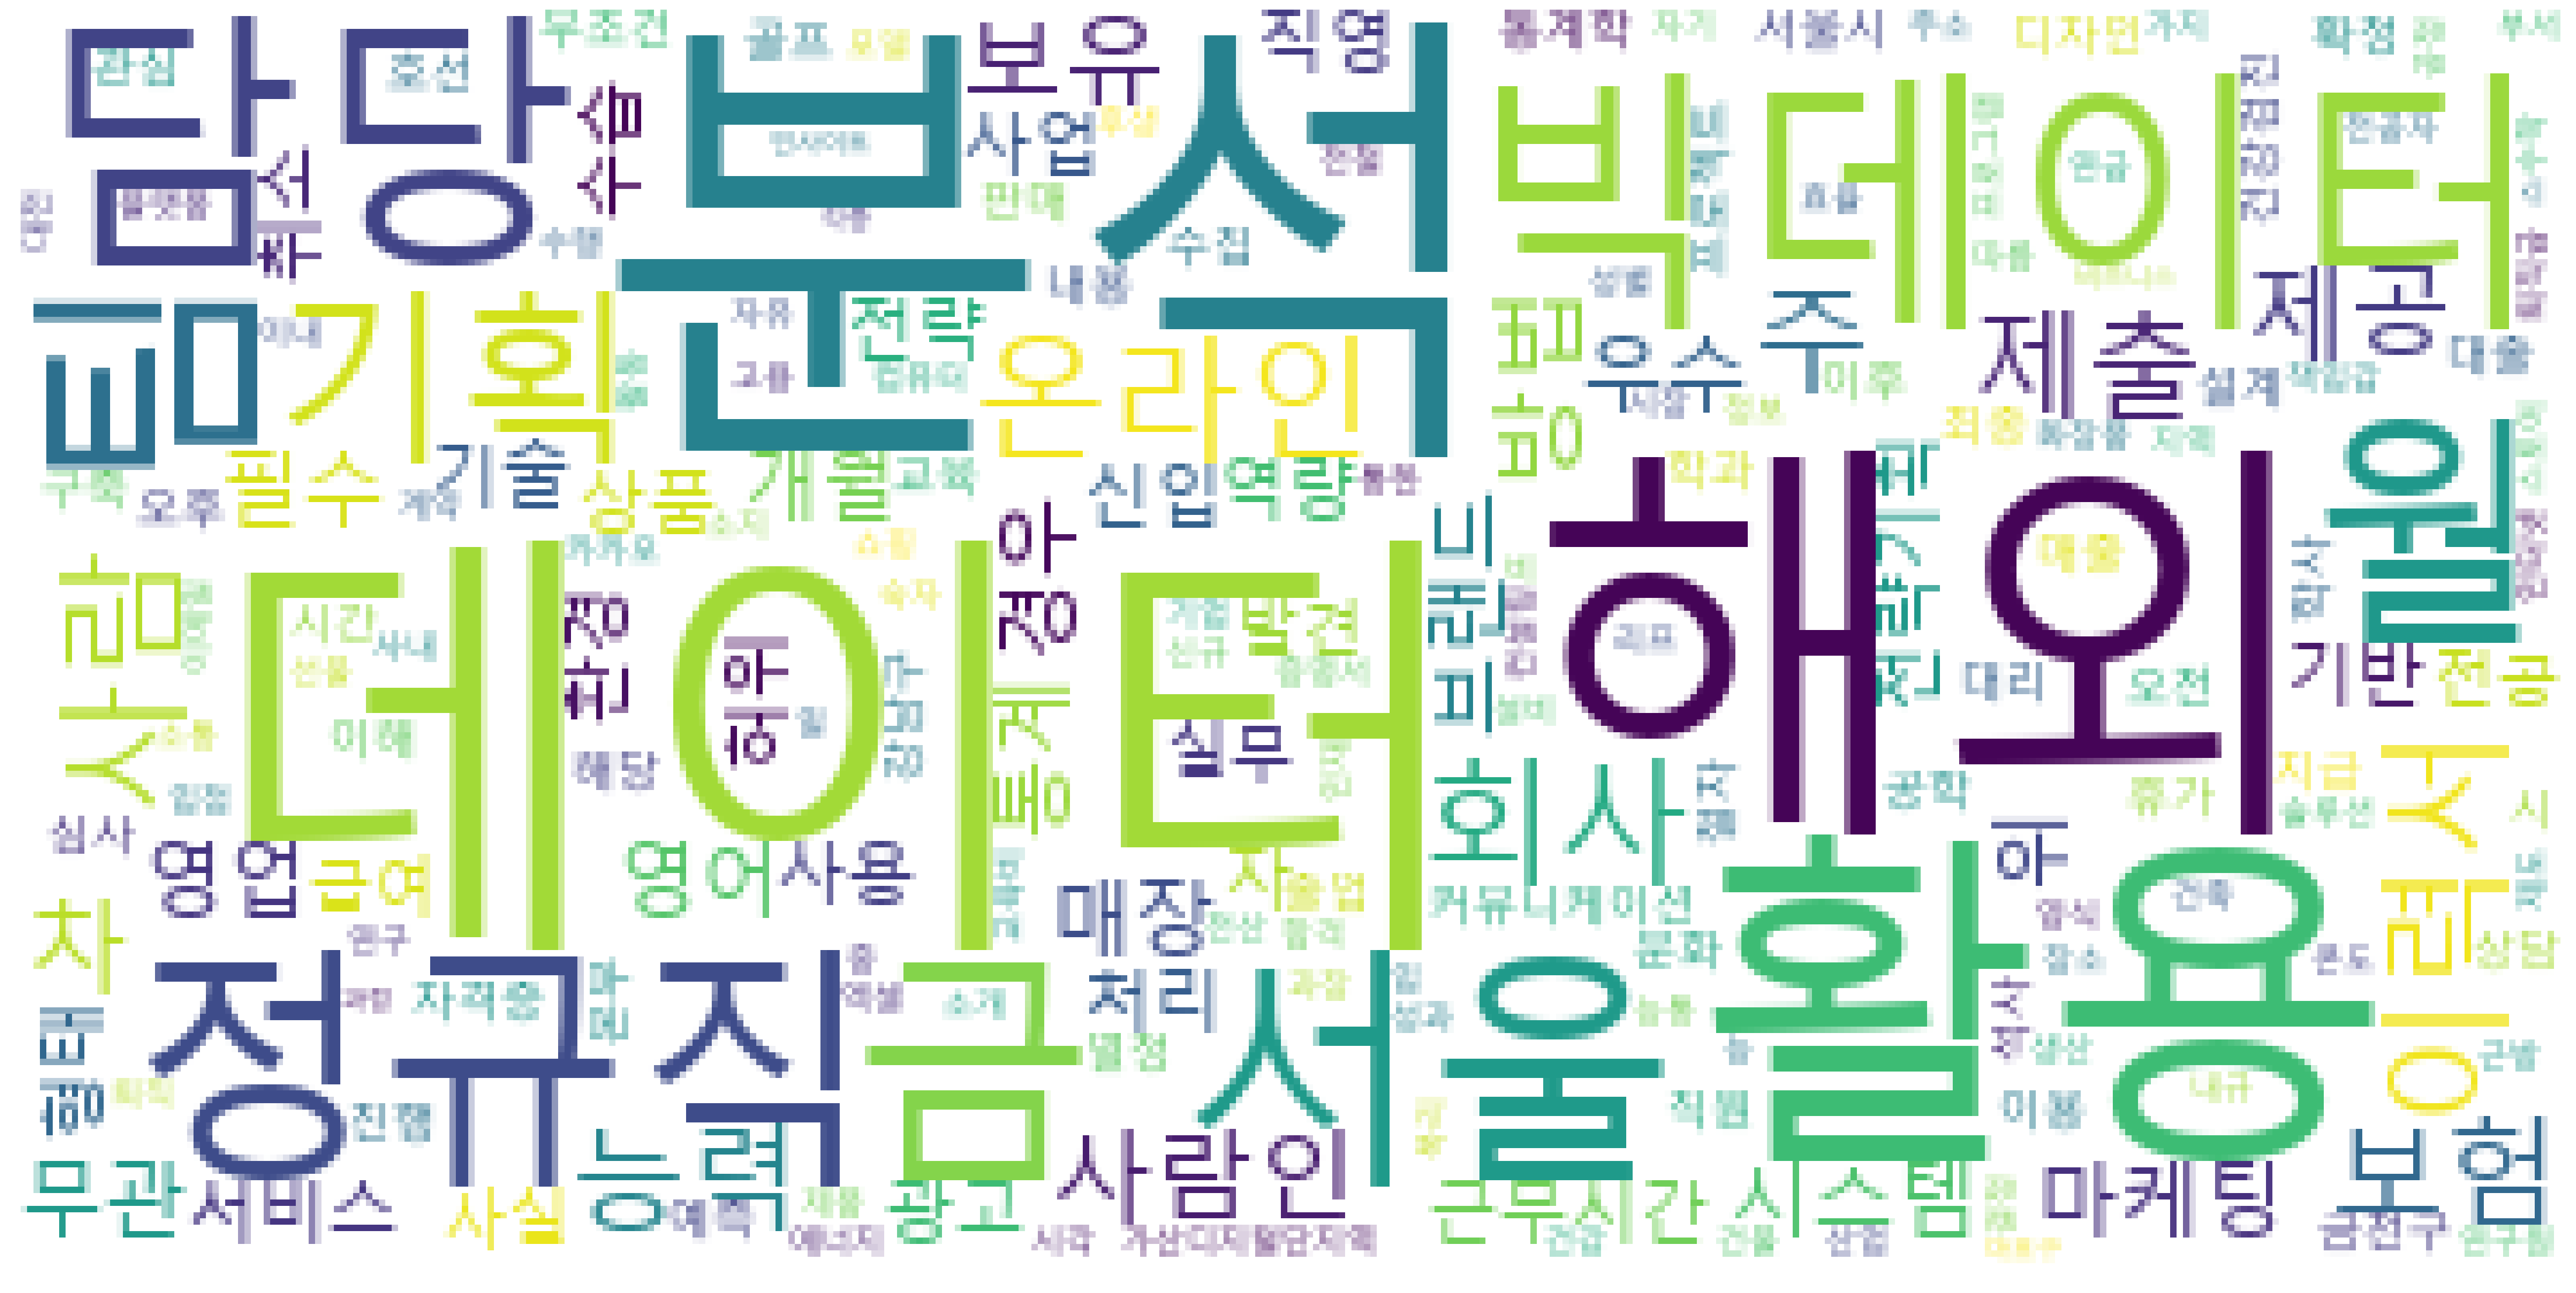

In [85]:
tmp_data=dict(data)

wordcloud=WordCloud(font_path=r'C:\Python\Python36\Lib\site-packages\pytagcloud\fonts\malgun.ttf',
                   relative_scaling=0.2,
                   background_color='white',
                   ).generate_from_frequencies(tmp_data)
plt.figure(figsize=(100,100))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

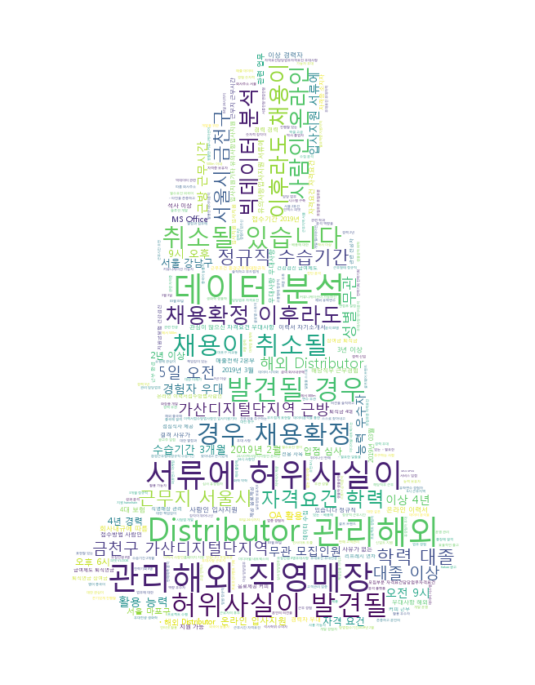

In [89]:
alice_mark = np.array(Image.open("alice.png"))
stopwords=set(STOPWORDS)
stopwords.add("said")


wc=WordCloud(font_path=r'C:\Python\Python36\Lib\site-packages\pytagcloud\fonts\malgun.ttf',
             background_color='white',max_words=500, mask=alice_mark,
             stopwords=stopwords, max_font_size=40,random_state=42)
wc.generate(text)


image_colors=ImageColorGenerator(alice_mark)


plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

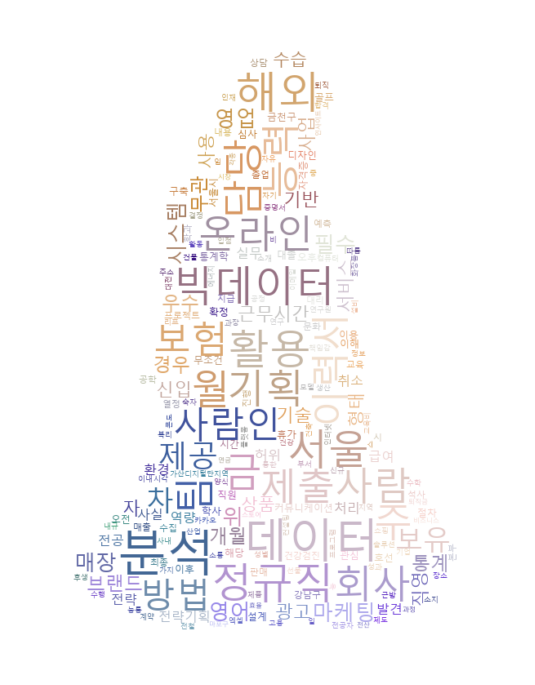

In [91]:
saramin_mark = np.array(Image.open("alice.png"))
image_colors=ImageColorGenerator(saramin_mark)

wordcloud=WordCloud(font_path=r'C:\Python\Python36\Lib\site-packages\pytagcloud\fonts\malgun.ttf',
                   relative_scaling=0.2, mask=saramin_mark, min_font_size=1, max_font_size=60,
                   background_color='white',
                   ).generate_from_frequencies(tmp_data)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()